# ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ***Import Dataset***

In [2]:
dataframe = pd.read_excel('/content/titanic3.xls')
dataframe.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# ***Basic EDA***

In [3]:
dataframe.shape

(1309, 14)

In [4]:
dataframe.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [5]:
dataframe.duplicated().sum()

np.int64(0)

In [6]:
print('Survived : ', dataframe.survived.unique())
print('PClasses : ', dataframe.pclass.unique())
print('Sex      : ', dataframe.sex.unique())
print('Embarked : ', dataframe.embarked.dropna().unique())

Survived :  [1 0]
PClasses :  [1 2 3]
Sex      :  ['female' 'male']
Embarked :  ['S' 'C' 'Q']


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


In [9]:
dataframe.survived.value_counts()

,count
survived,
0,809
1,500


In [10]:
survival_ratio = dataframe.survived.value_counts(normalize = True)
print('Percentage of Survivors : ', round(survival_ratio[1]*100, 2), '%')
print('Percentage of Dead      : ', round(survival_ratio[0]*100, 2), '%')

Percentage of Survivors :  38.2 %
Percentage of Dead      :  61.8 %


In [11]:
# Survival and passenger class
dataframe.groupby('pclass').survived.value_counts(normalize = True).sort_index()

pclass  survived
1       0           0.380805
        1           0.619195
2       0           0.570397
        1           0.429603
3       0           0.744711
        1           0.255289
Name: proportion, dtype: float64

In [12]:
dataframe['pclass'] = dataframe['pclass'].astype(str)
dataframe['survived'] = dataframe['survived'].astype(str)
print(dataframe.dtypes[['pclass', 'survived']])

pclass      object
survived    object
dtype: object


In [13]:
# Sex and Survived
dataframe.groupby('sex').survived.value_counts(normalize = True).sort_index()

sex     survived
female  0           0.272532
        1           0.727468
male    0           0.809015
        1           0.190985
Name: proportion, dtype: float64

In [14]:
# Embarked and Survived
dataframe.groupby('embarked').survived.value_counts(normalize = True).sort_index()

embarked  survived
C         0           0.444444
          1           0.555556
Q         0           0.642276
          1           0.357724
S         0           0.667396
          1           0.332604
Name: proportion, dtype: float64

In [15]:
# Embarked and Pclass
dataframe.groupby('embarked').pclass.value_counts(normalize = True).sort_index()

embarked  pclass
C         1         0.522222
          2         0.103704
          3         0.374074
Q         1         0.024390
          2         0.056911
          3         0.918699
S         1         0.193654
          2         0.264770
          3         0.541575
Name: proportion, dtype: float64

In [16]:
#  We will create a new column for total family members
dataframe['fam_mem'] = dataframe.sibsp + dataframe.parch
dataframe.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fam_mem
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


# ***Baisc Data Cleaning***

In [17]:
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']
num_cols = [col for col in dataframe.columns if col not in cat_cols]

In [18]:
for col in num_cols:
  dataframe[col] = dataframe[col].fillna(dataframe[col].median())
for col in cat_cols:
  dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])

In [19]:
dataframe.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [20]:
dataframe.drop(columns=["home.dest","boat","cabin","body"], inplace=True,axis=1)

In [21]:
dataframe.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,fam_mem
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,3


# ***Visulization***

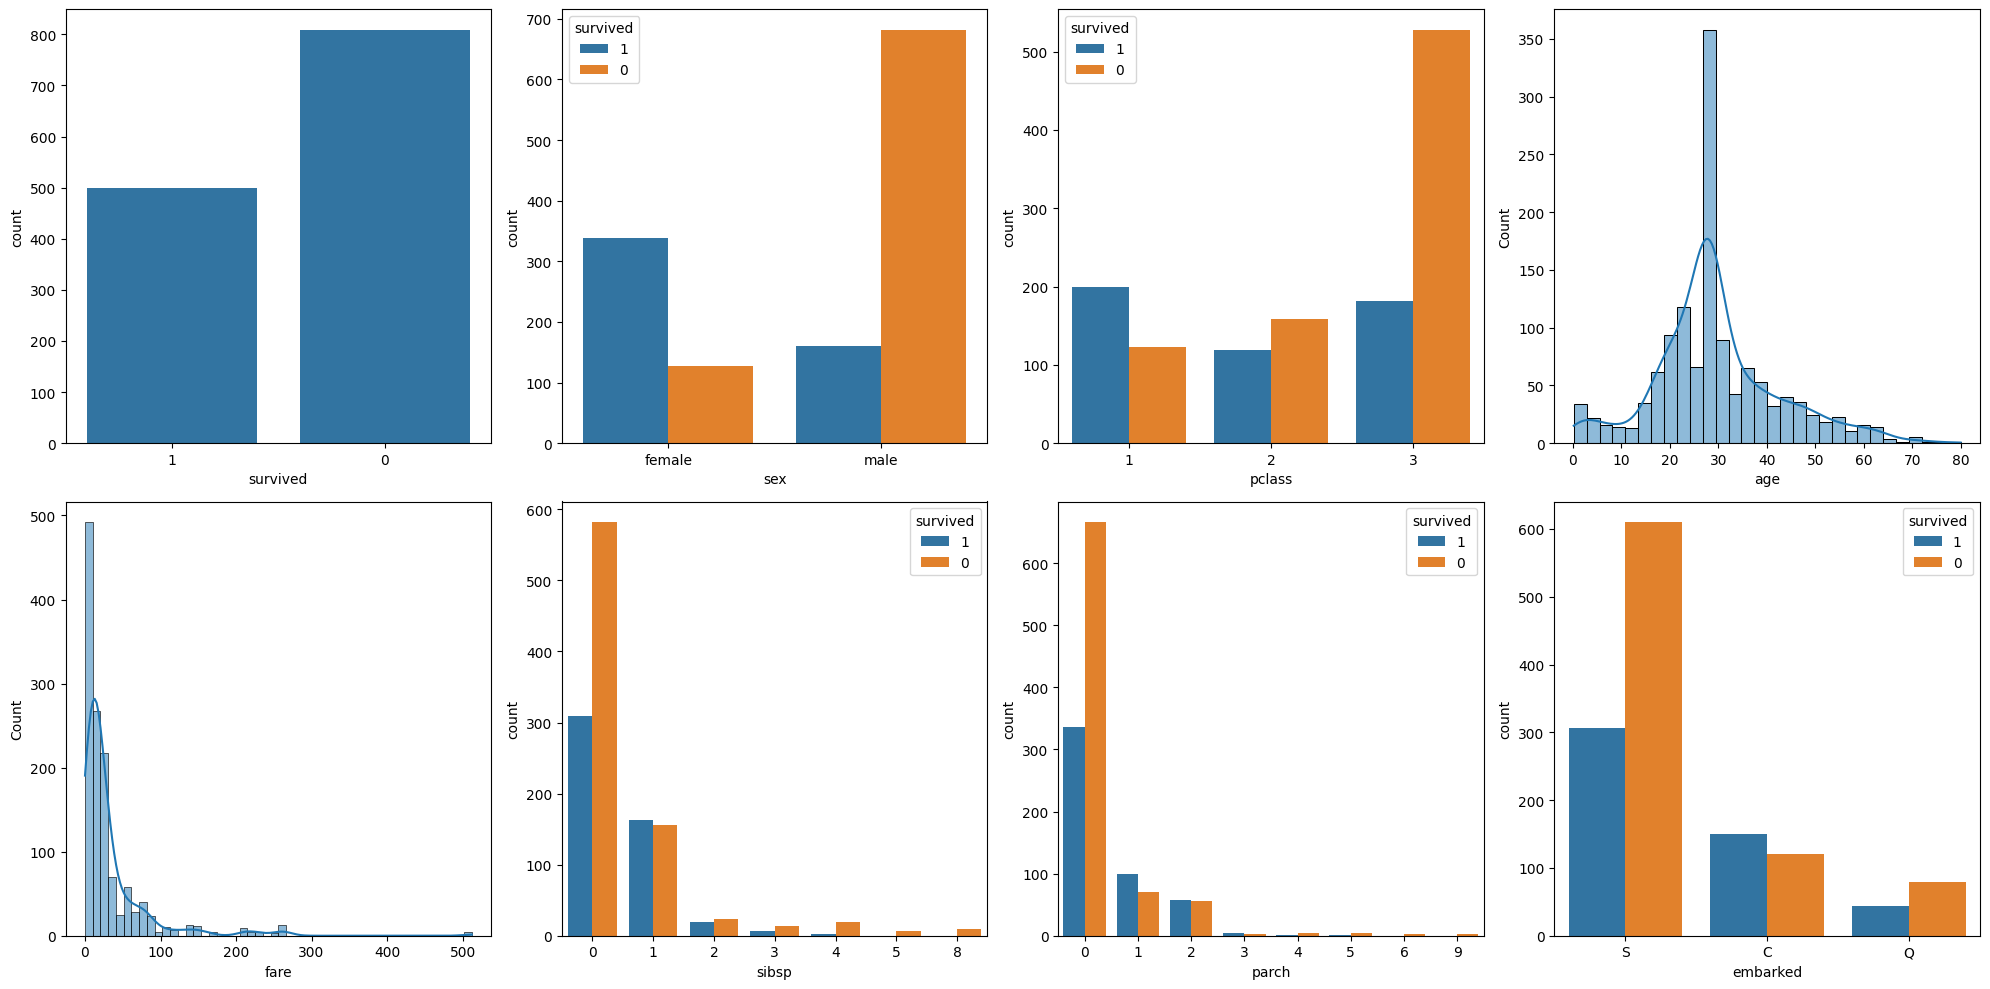

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sns.countplot(x="survived", data=dataframe, ax=axes[0, 0])
sns.countplot(x="sex", data=dataframe, hue=dataframe["survived"], ax=axes[0, 1])
sns.countplot(x="pclass", data=dataframe, hue=dataframe["survived"], ax=axes[0, 2])
sns.histplot(dataframe["age"], bins=30, kde=True, ax=axes[0, 3])
sns.histplot(dataframe["fare"], bins=50, kde=True, ax=axes[1, 0])
sns.countplot(x="sibsp", data=dataframe, hue=dataframe["survived"], ax=axes[1, 1])
sns.countplot(x="parch", data=dataframe, hue=dataframe["survived"], ax=axes[1, 2])
sns.countplot(x="embarked", data=dataframe, hue=dataframe["survived"], ax=axes[1, 3])
plt.tight_layout()
plt.show()

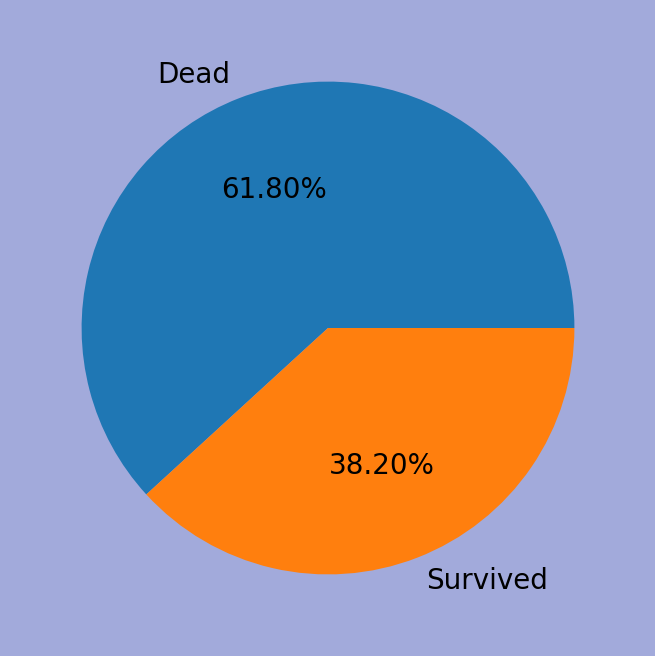

In [23]:
# Creating visualization using Pie chart.

survival_data = dataframe.survived.value_counts().values
labels = ['Dead', 'Survived']

plt.figure(figsize = (18,4), dpi = 200, facecolor = '#a2aadb')
plt.pie(survival_data, labels = labels, autopct = '%1.2f%%')

plt.show()

<Axes: xlabel='pclass', ylabel='count'>

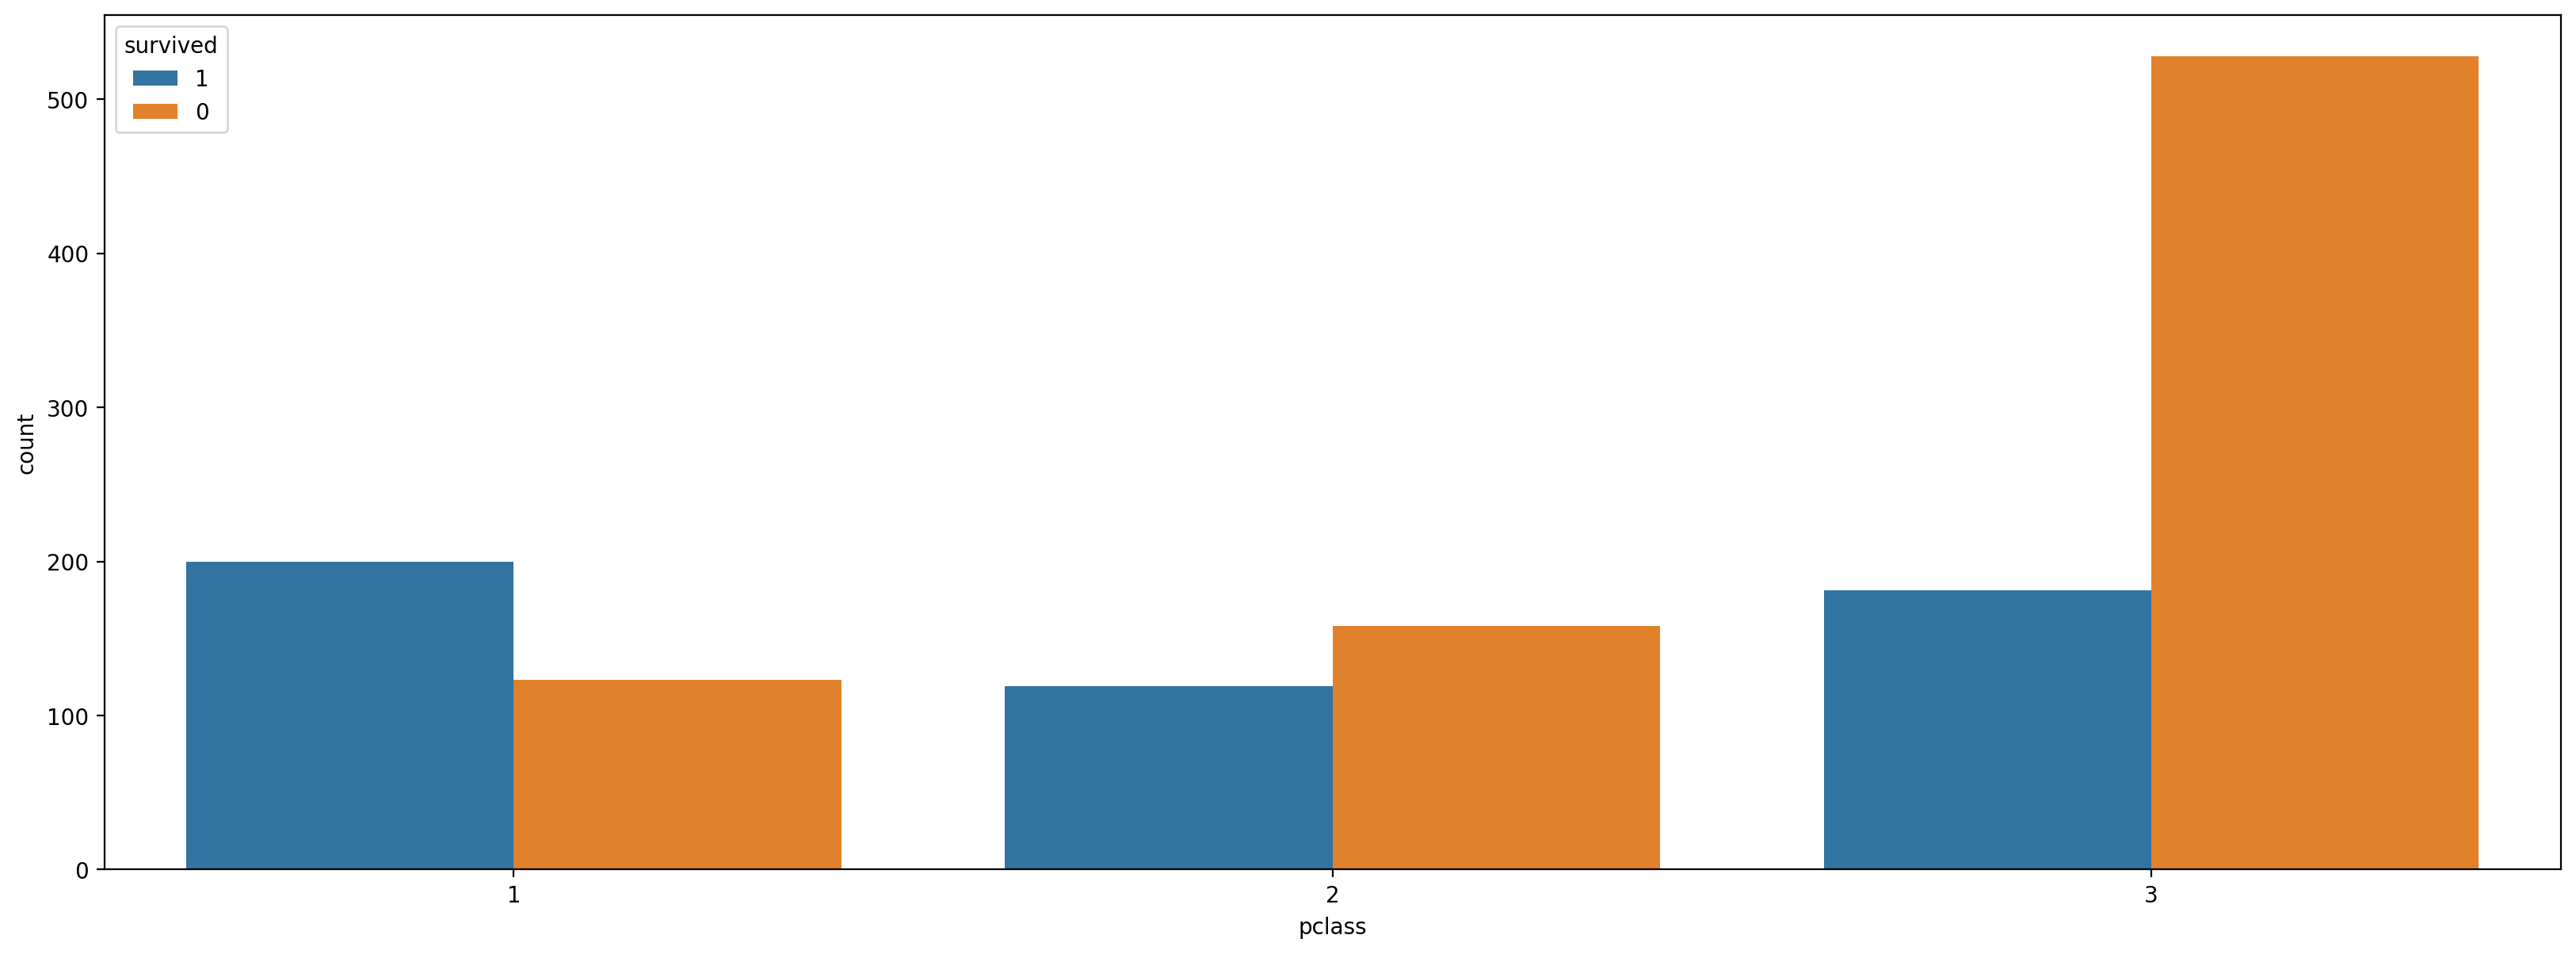

In [24]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = dataframe.pclass, hue = dataframe.survived)

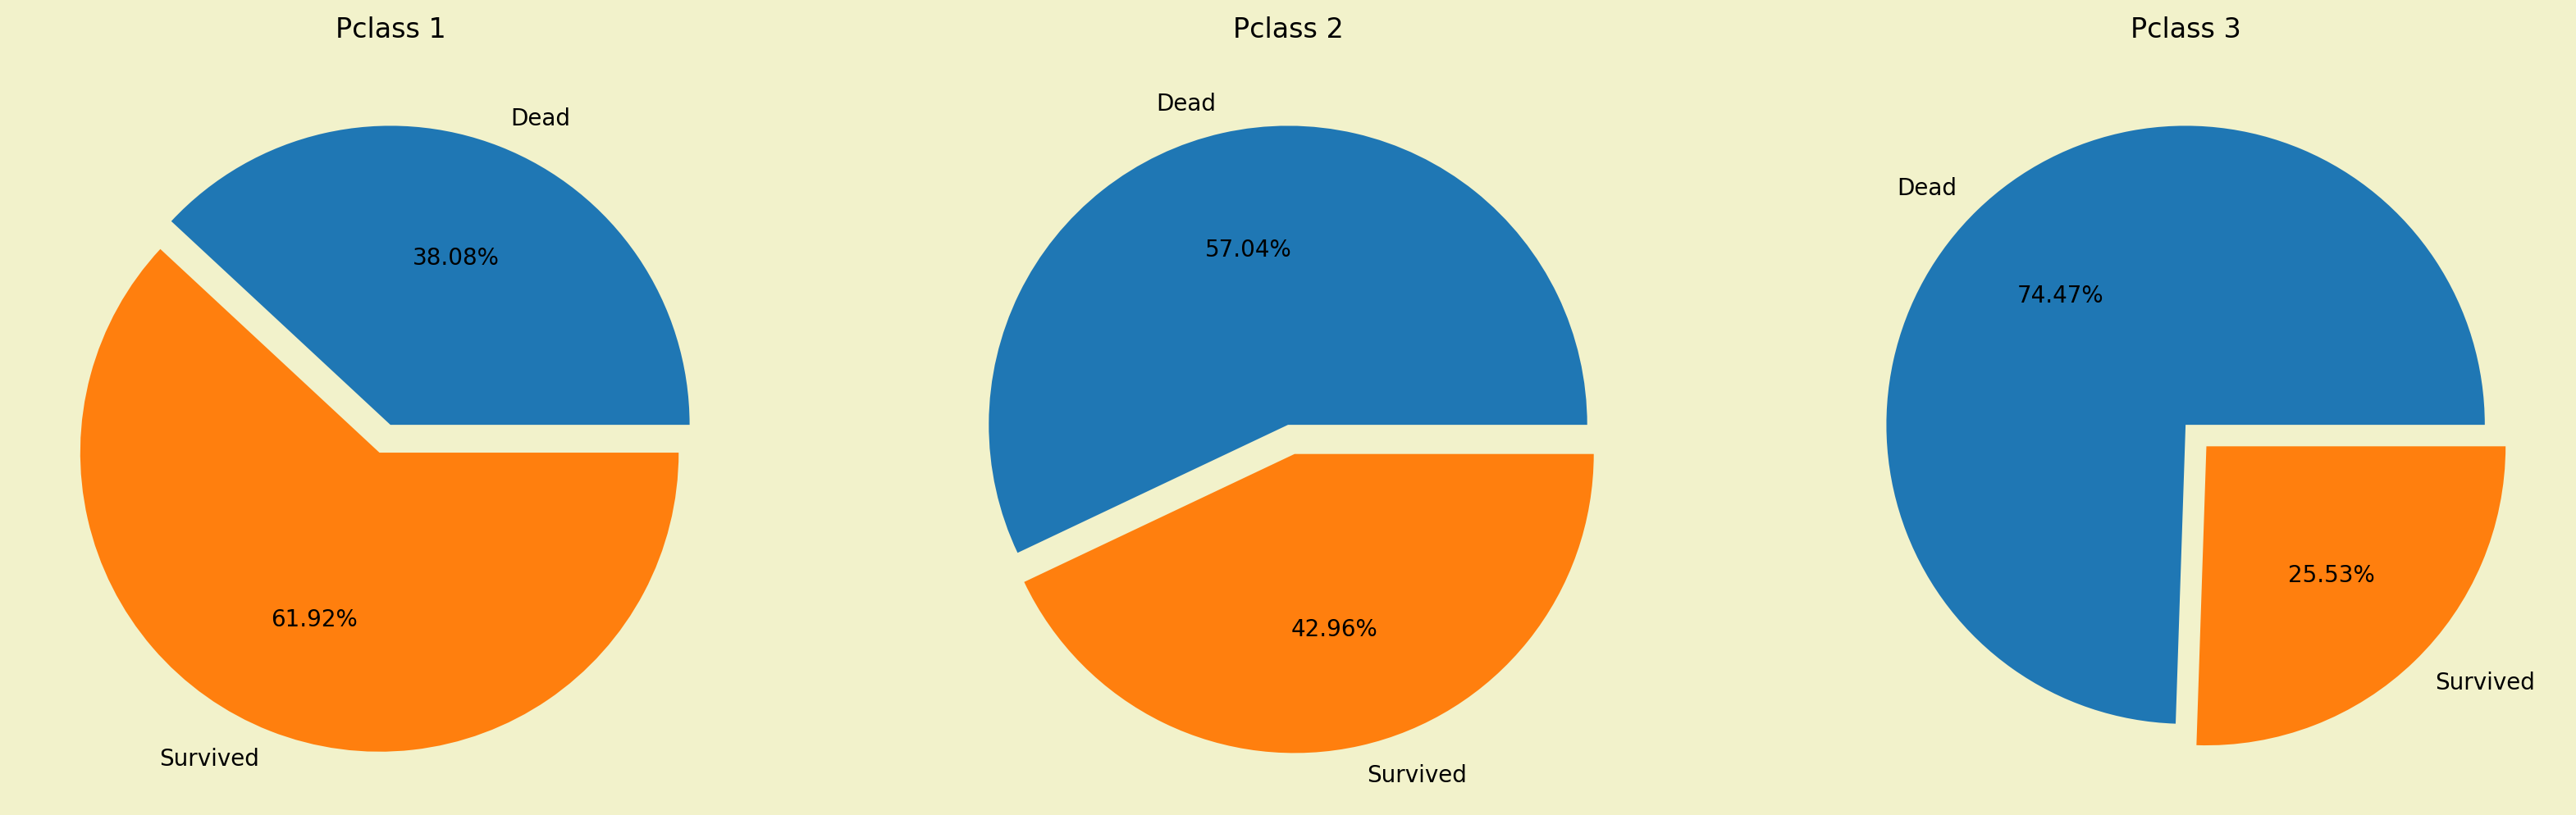

In [25]:
dataframe['pclass'] = dataframe['pclass'].astype(int)
pclass_svl_rate = dataframe.groupby('pclass').survived.value_counts(normalize = True).sort_index()
pclass1 = pclass_svl_rate[1]
pclass2 = pclass_svl_rate[2]
pclass3 = pclass_svl_rate[3]

labels = ['Dead', 'Survived']

plt.figure(figsize = (20,6), dpi = 200, facecolor = '#f2f2cb')
plt.subplot(1,3,1)
plt.pie(pclass1, labels = labels, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 1')
plt.subplot(1,3,2)
plt.pie(pclass2, labels = labels, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 2')
plt.subplot(1,3,3)
plt.pie(pclass3, labels = labels, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 3')

plt.show()

<Axes: xlabel='sex', ylabel='count'>

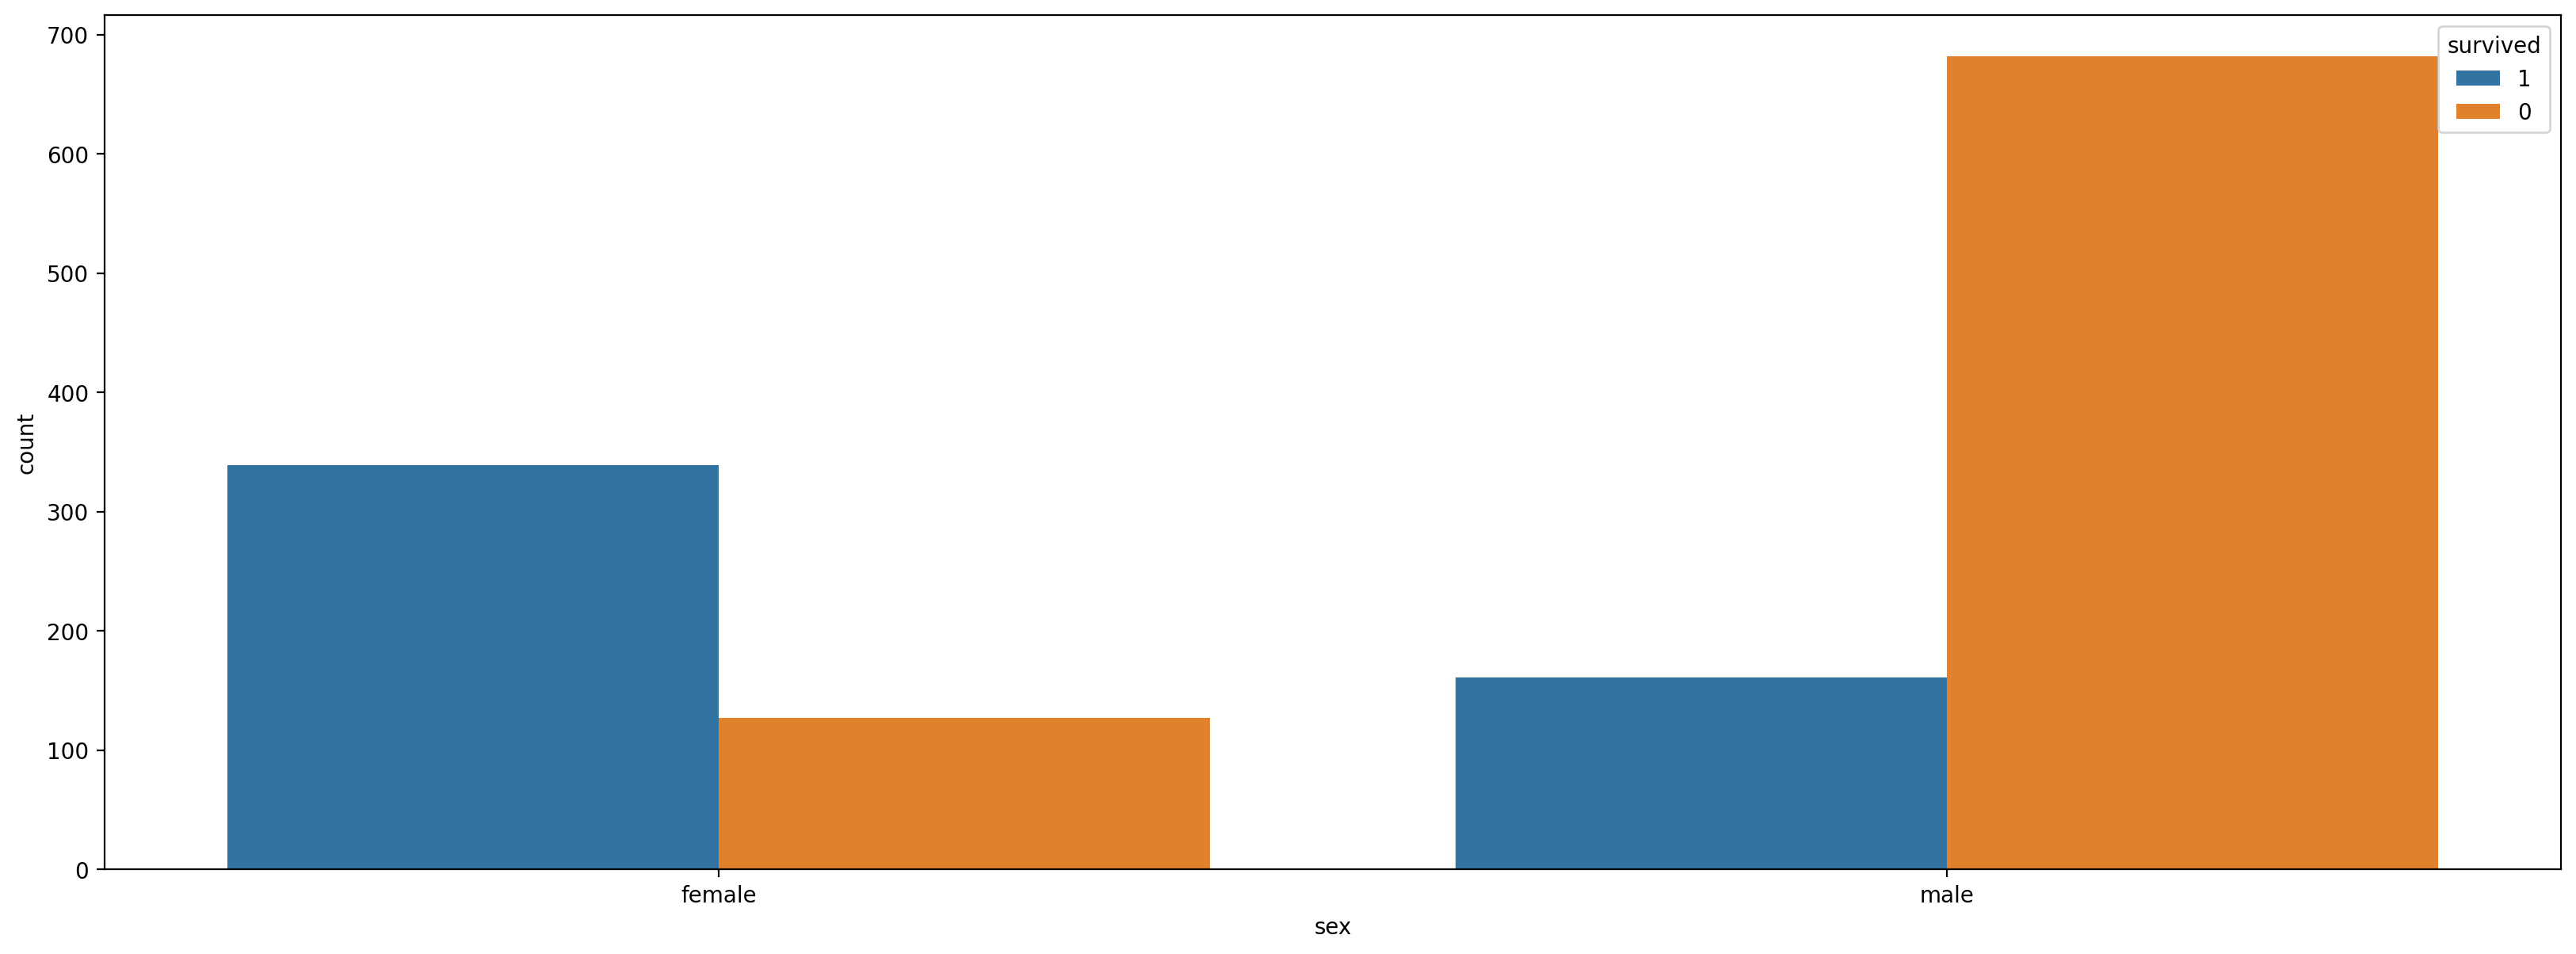

In [26]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = dataframe.sex, hue = dataframe.survived)

<Axes: xlabel='embarked', ylabel='count'>

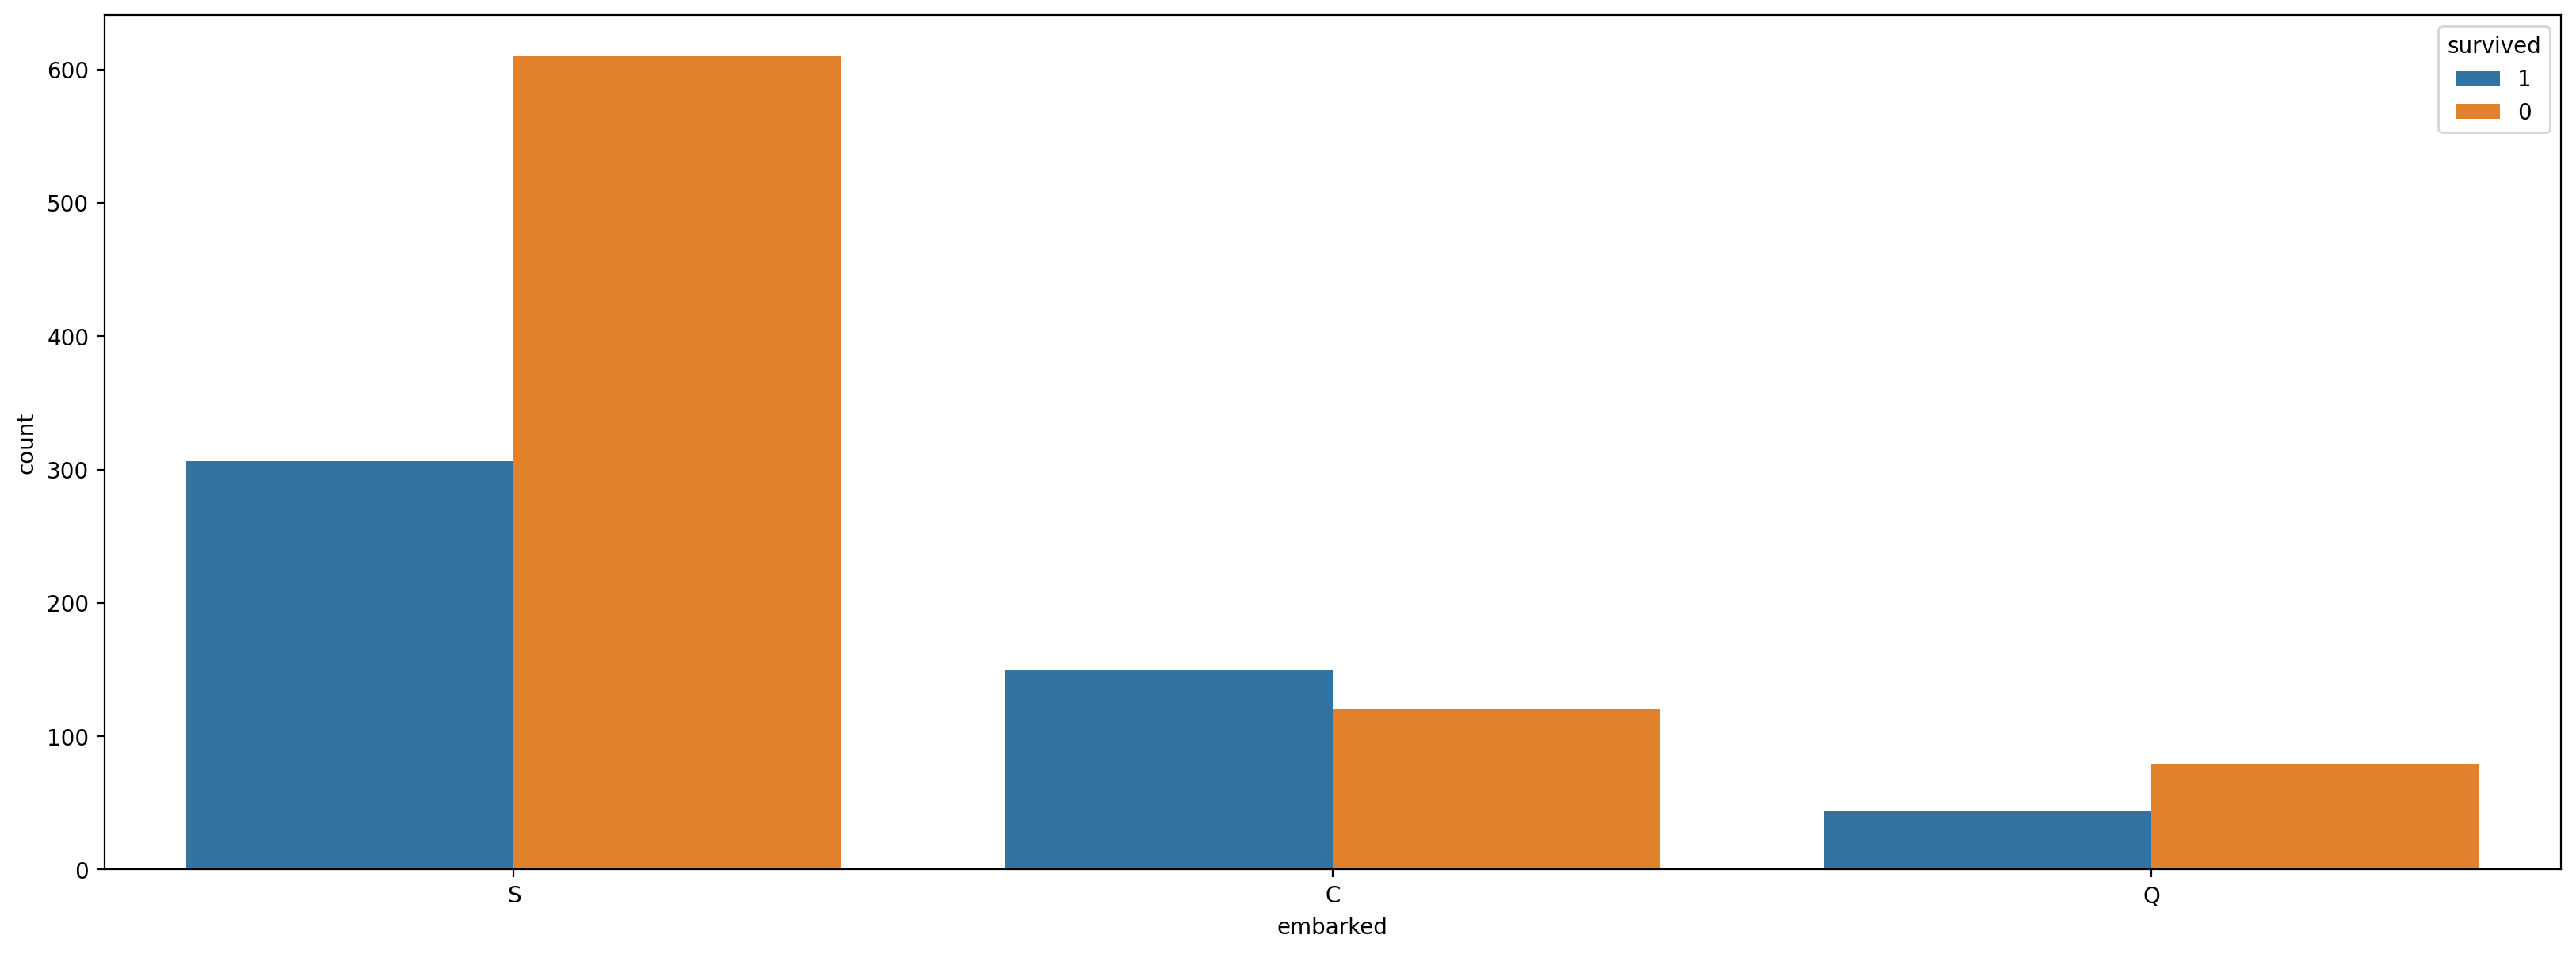

In [27]:
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = dataframe.embarked, hue = dataframe.survived)

<Axes: xlabel='embarked', ylabel='count'>

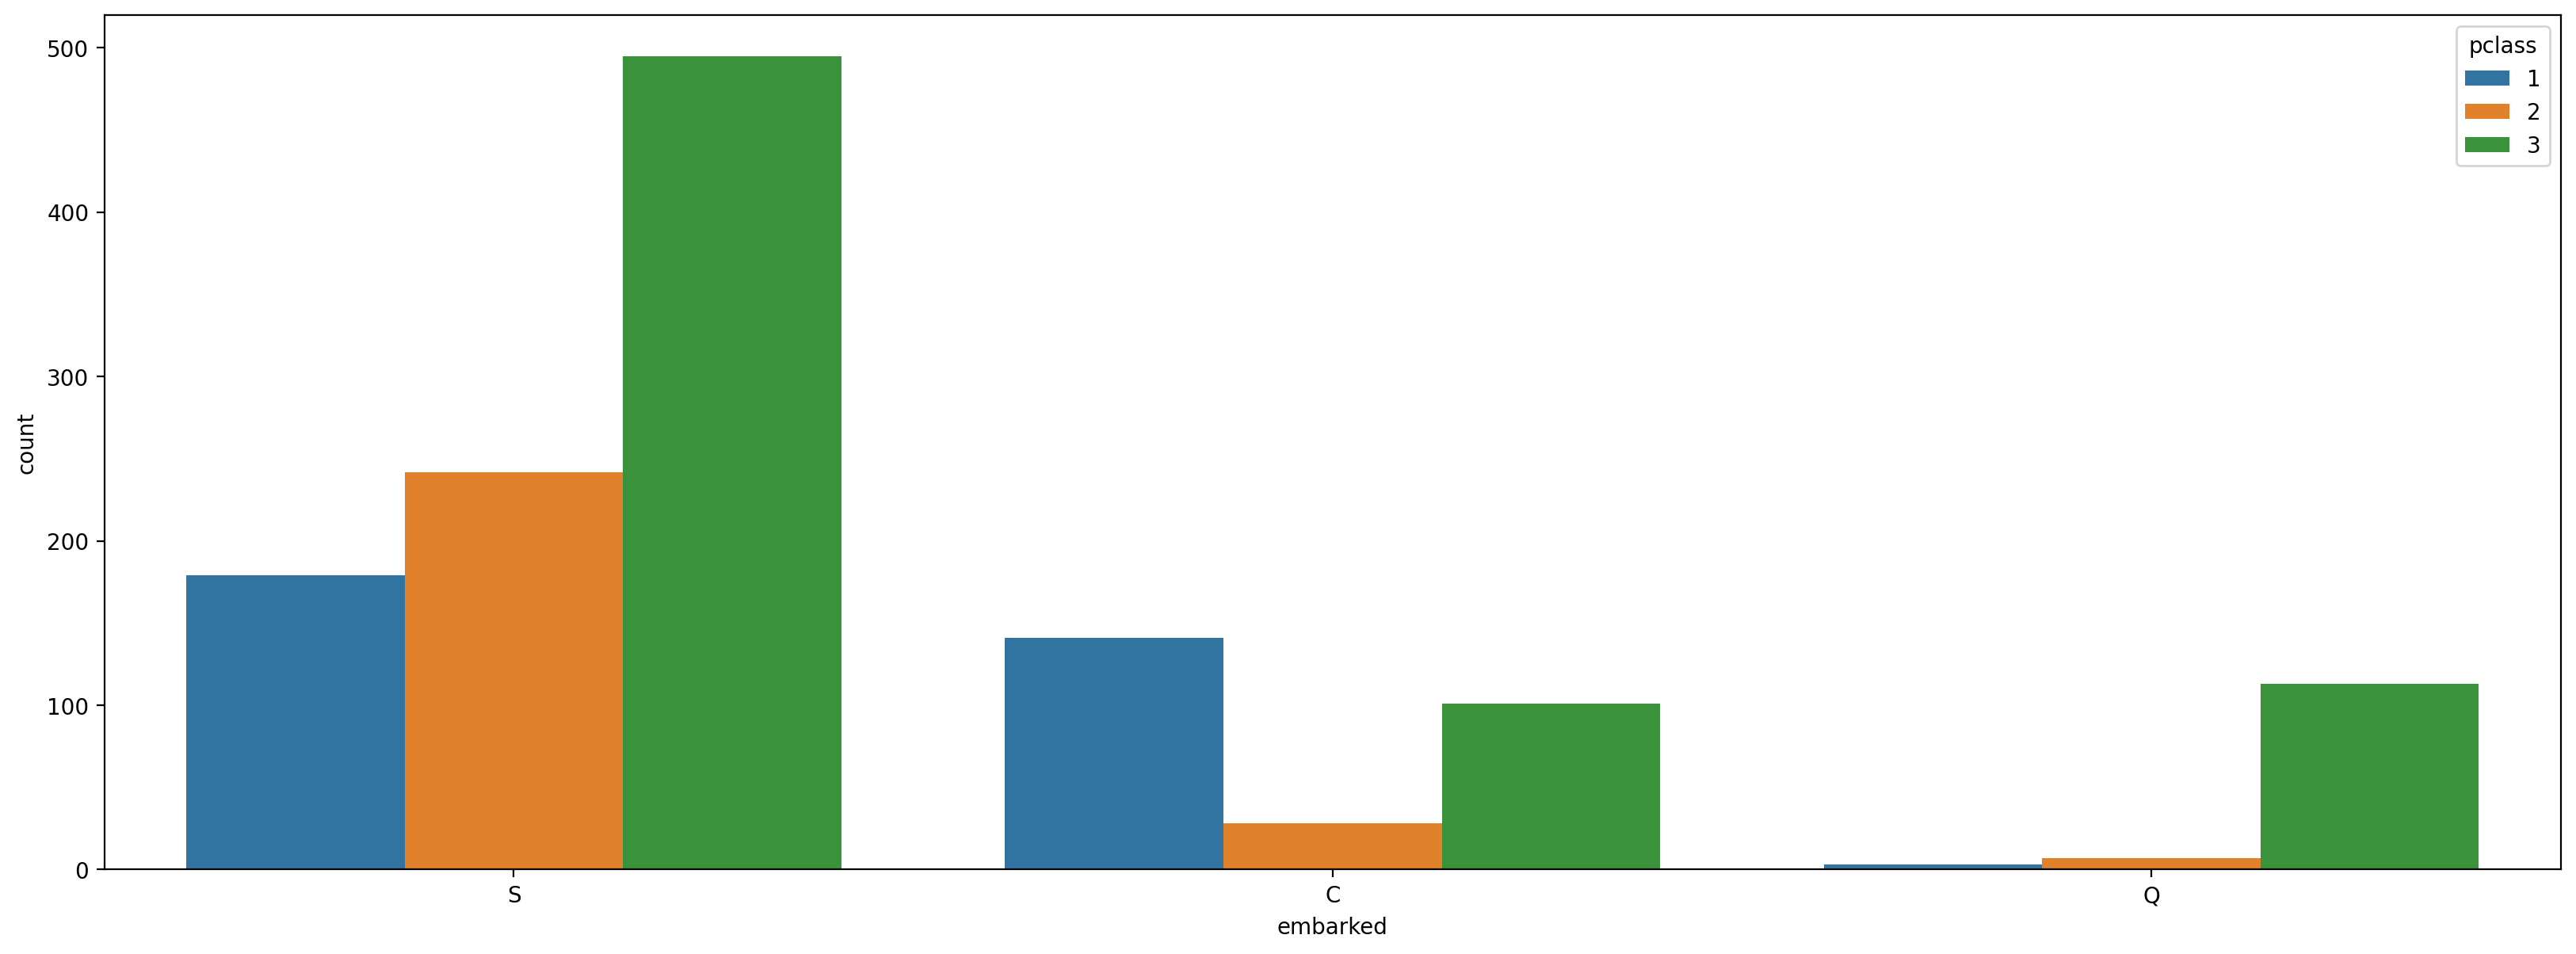

In [28]:
dataframe['pclass'] = dataframe['pclass'].astype(str)
dataframe['embarked'] = dataframe['embarked'].astype(str)
plt.figure(figsize = (20,7), dpi = 200)
sns.countplot(x = dataframe.embarked, hue = dataframe.pclass)

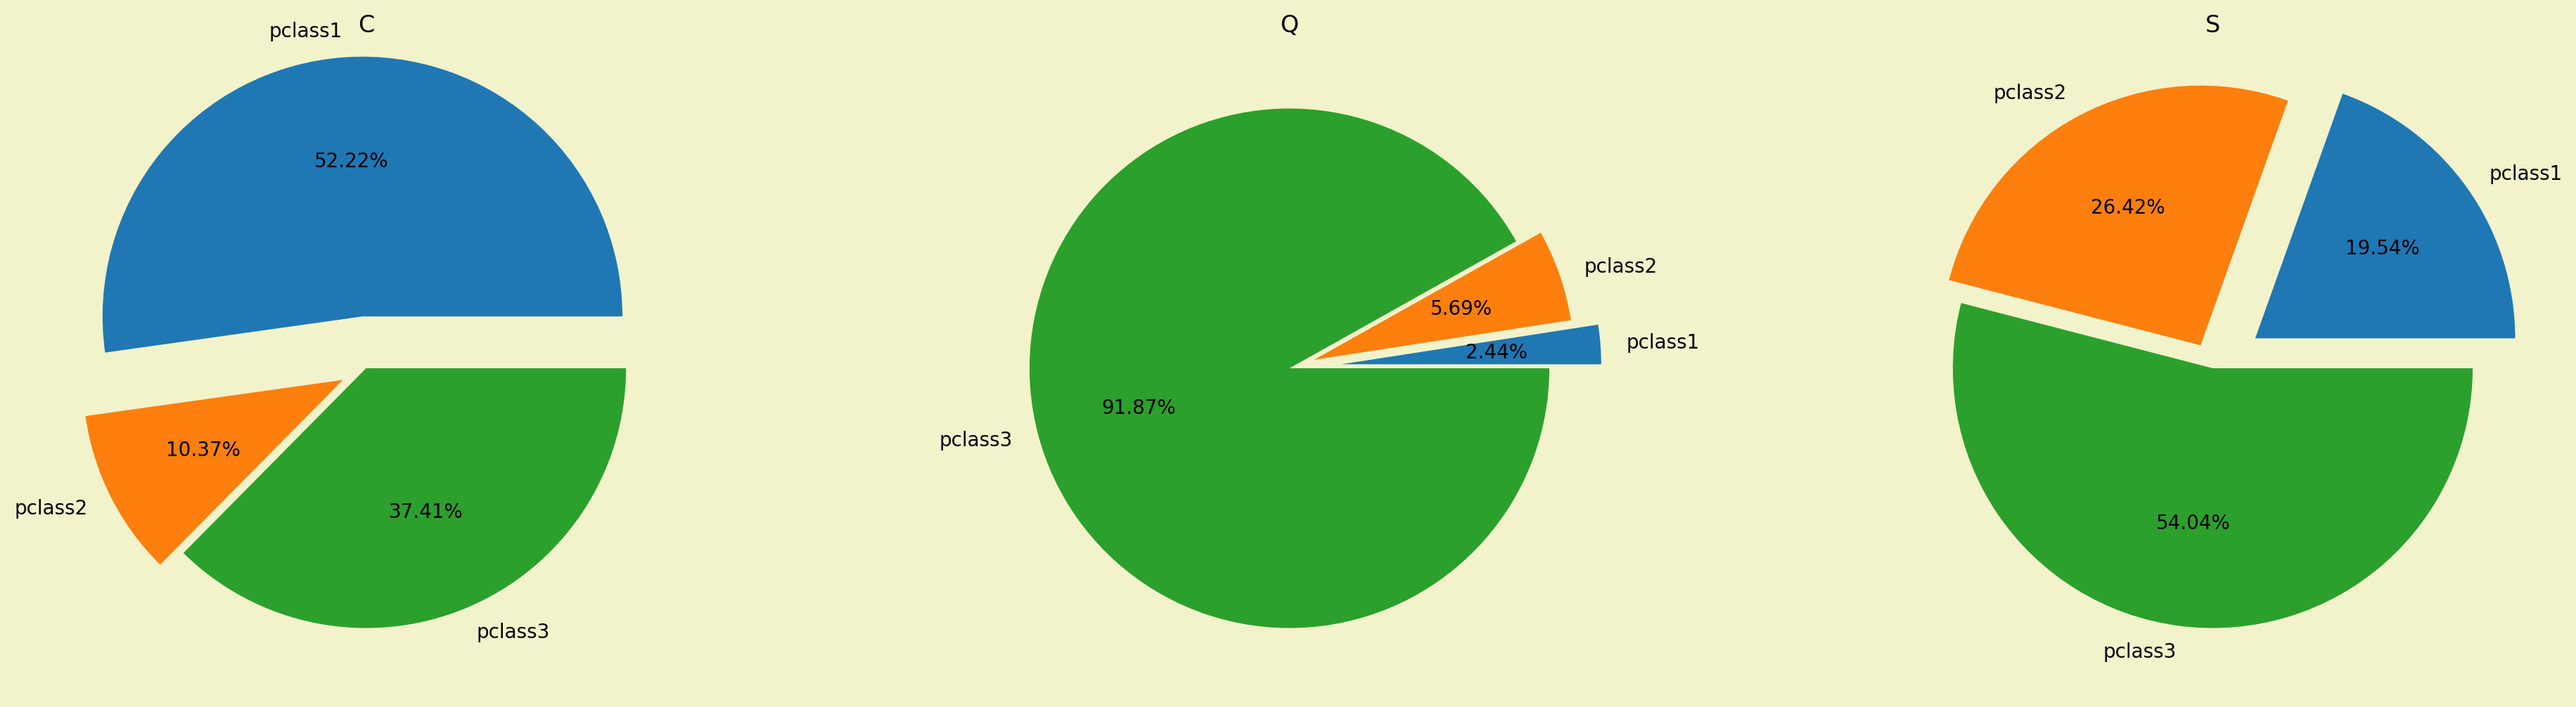

In [29]:
emb_pclass = dataframe.groupby('embarked').pclass.value_counts().sort_index()
emb_c = emb_pclass['C']
emb_q = emb_pclass['Q']
emb_s = emb_pclass['S']

labels = ['pclass1', 'pclass2', 'pclass3']

plt.figure(figsize = (24,6), dpi = 200, facecolor = '#f2f2cb')
plt.subplot(1,3,1)
plt.pie(emb_c, labels = labels, autopct = '%1.2f%%', explode = [0.2,0.1,0])
plt.title('C')
plt.subplot(1,3,2)
plt.pie(emb_q, labels = labels, autopct = '%1.2f%%', explode = [0.2,0.1,0])
plt.title('Q')
plt.subplot(1,3,3)
plt.pie(emb_s, labels = labels, autopct = '%1.2f%%', explode = [0.2,0.1,0])
plt.title('S')

plt.show()

<Axes: xlabel='fam_mem', ylabel='count'>

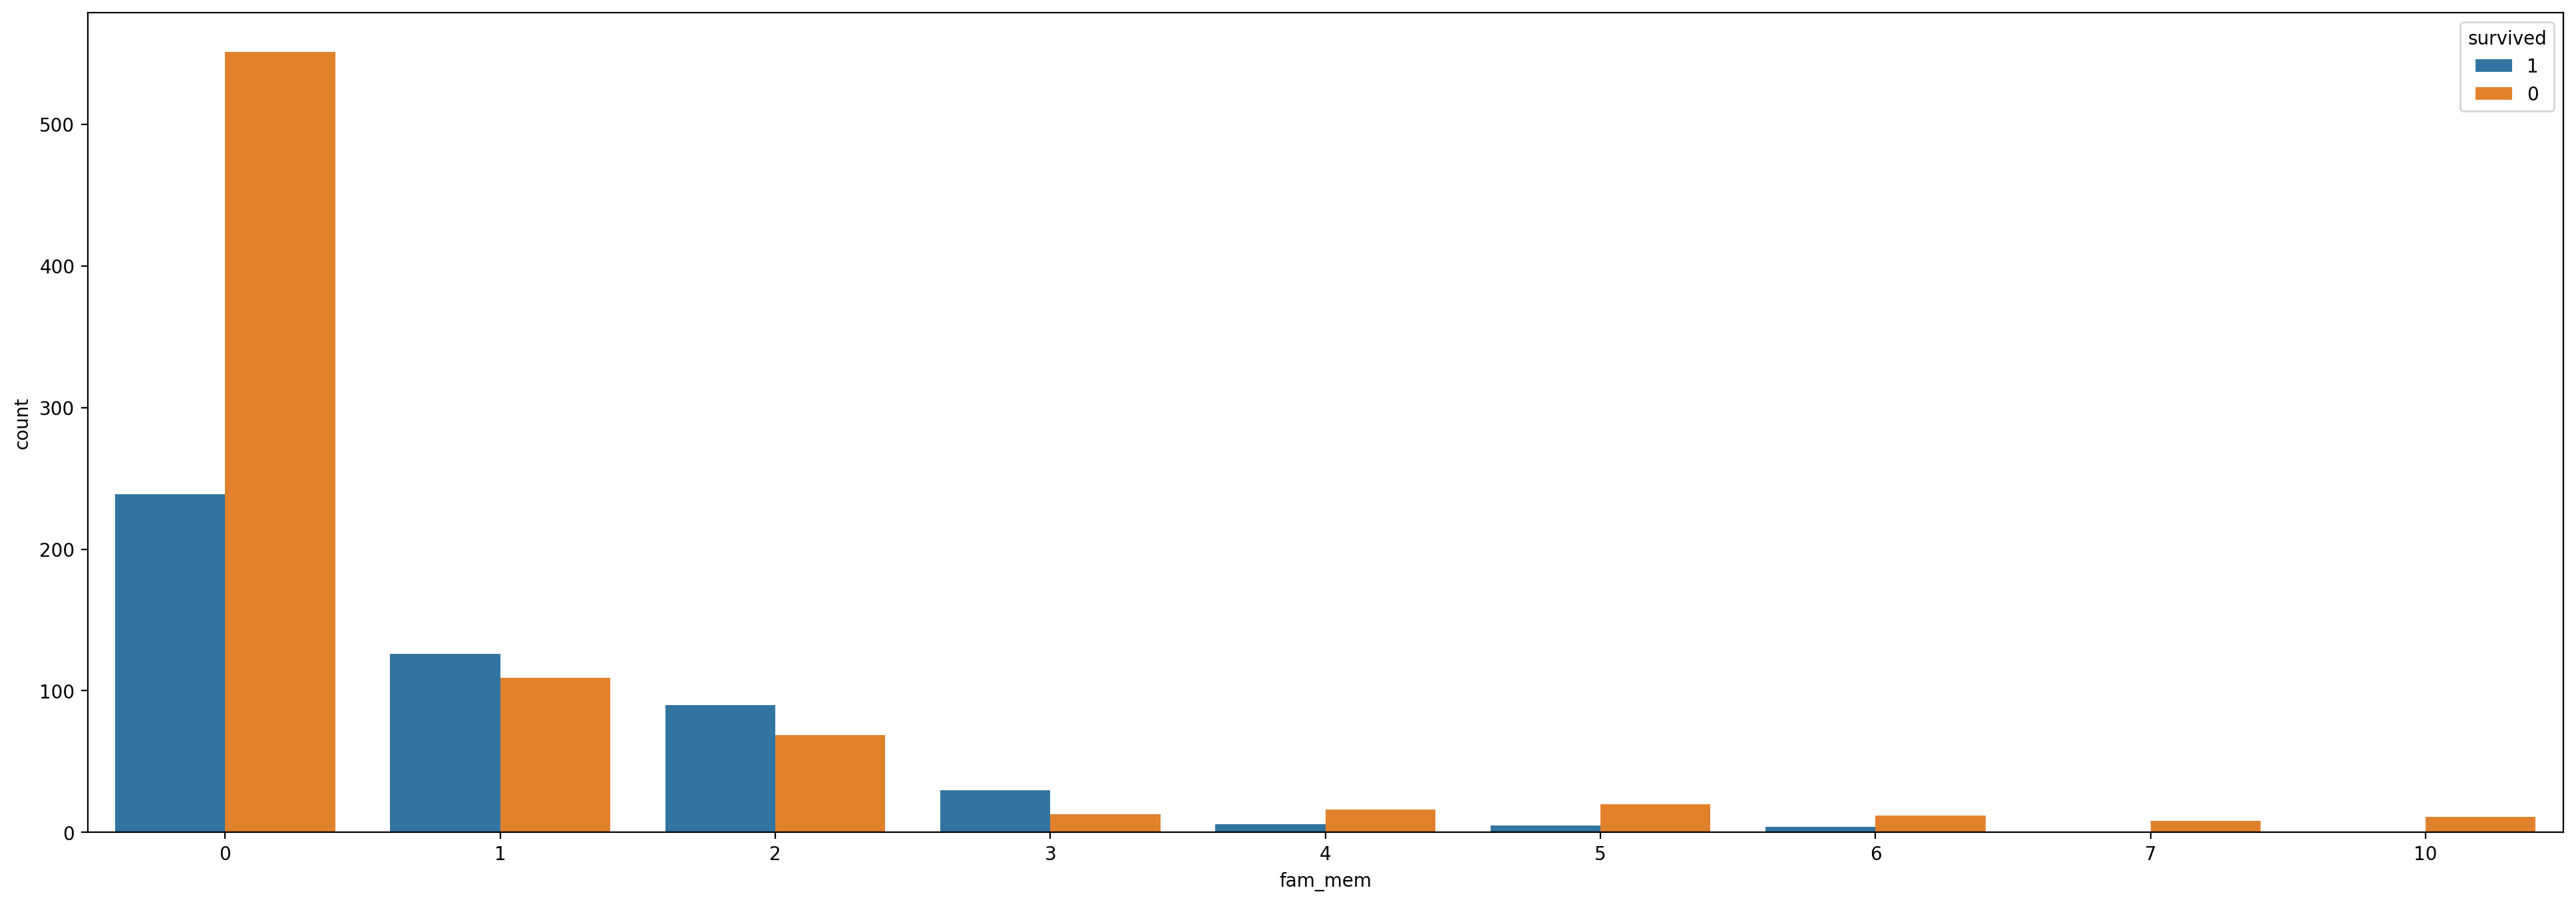

In [30]:
# Family and survived
plt.figure(figsize = (24,8), dpi = 200)
sns.countplot(x = dataframe.fam_mem, hue = dataframe.survived)

<Axes: xlabel='sex', ylabel='fare'>

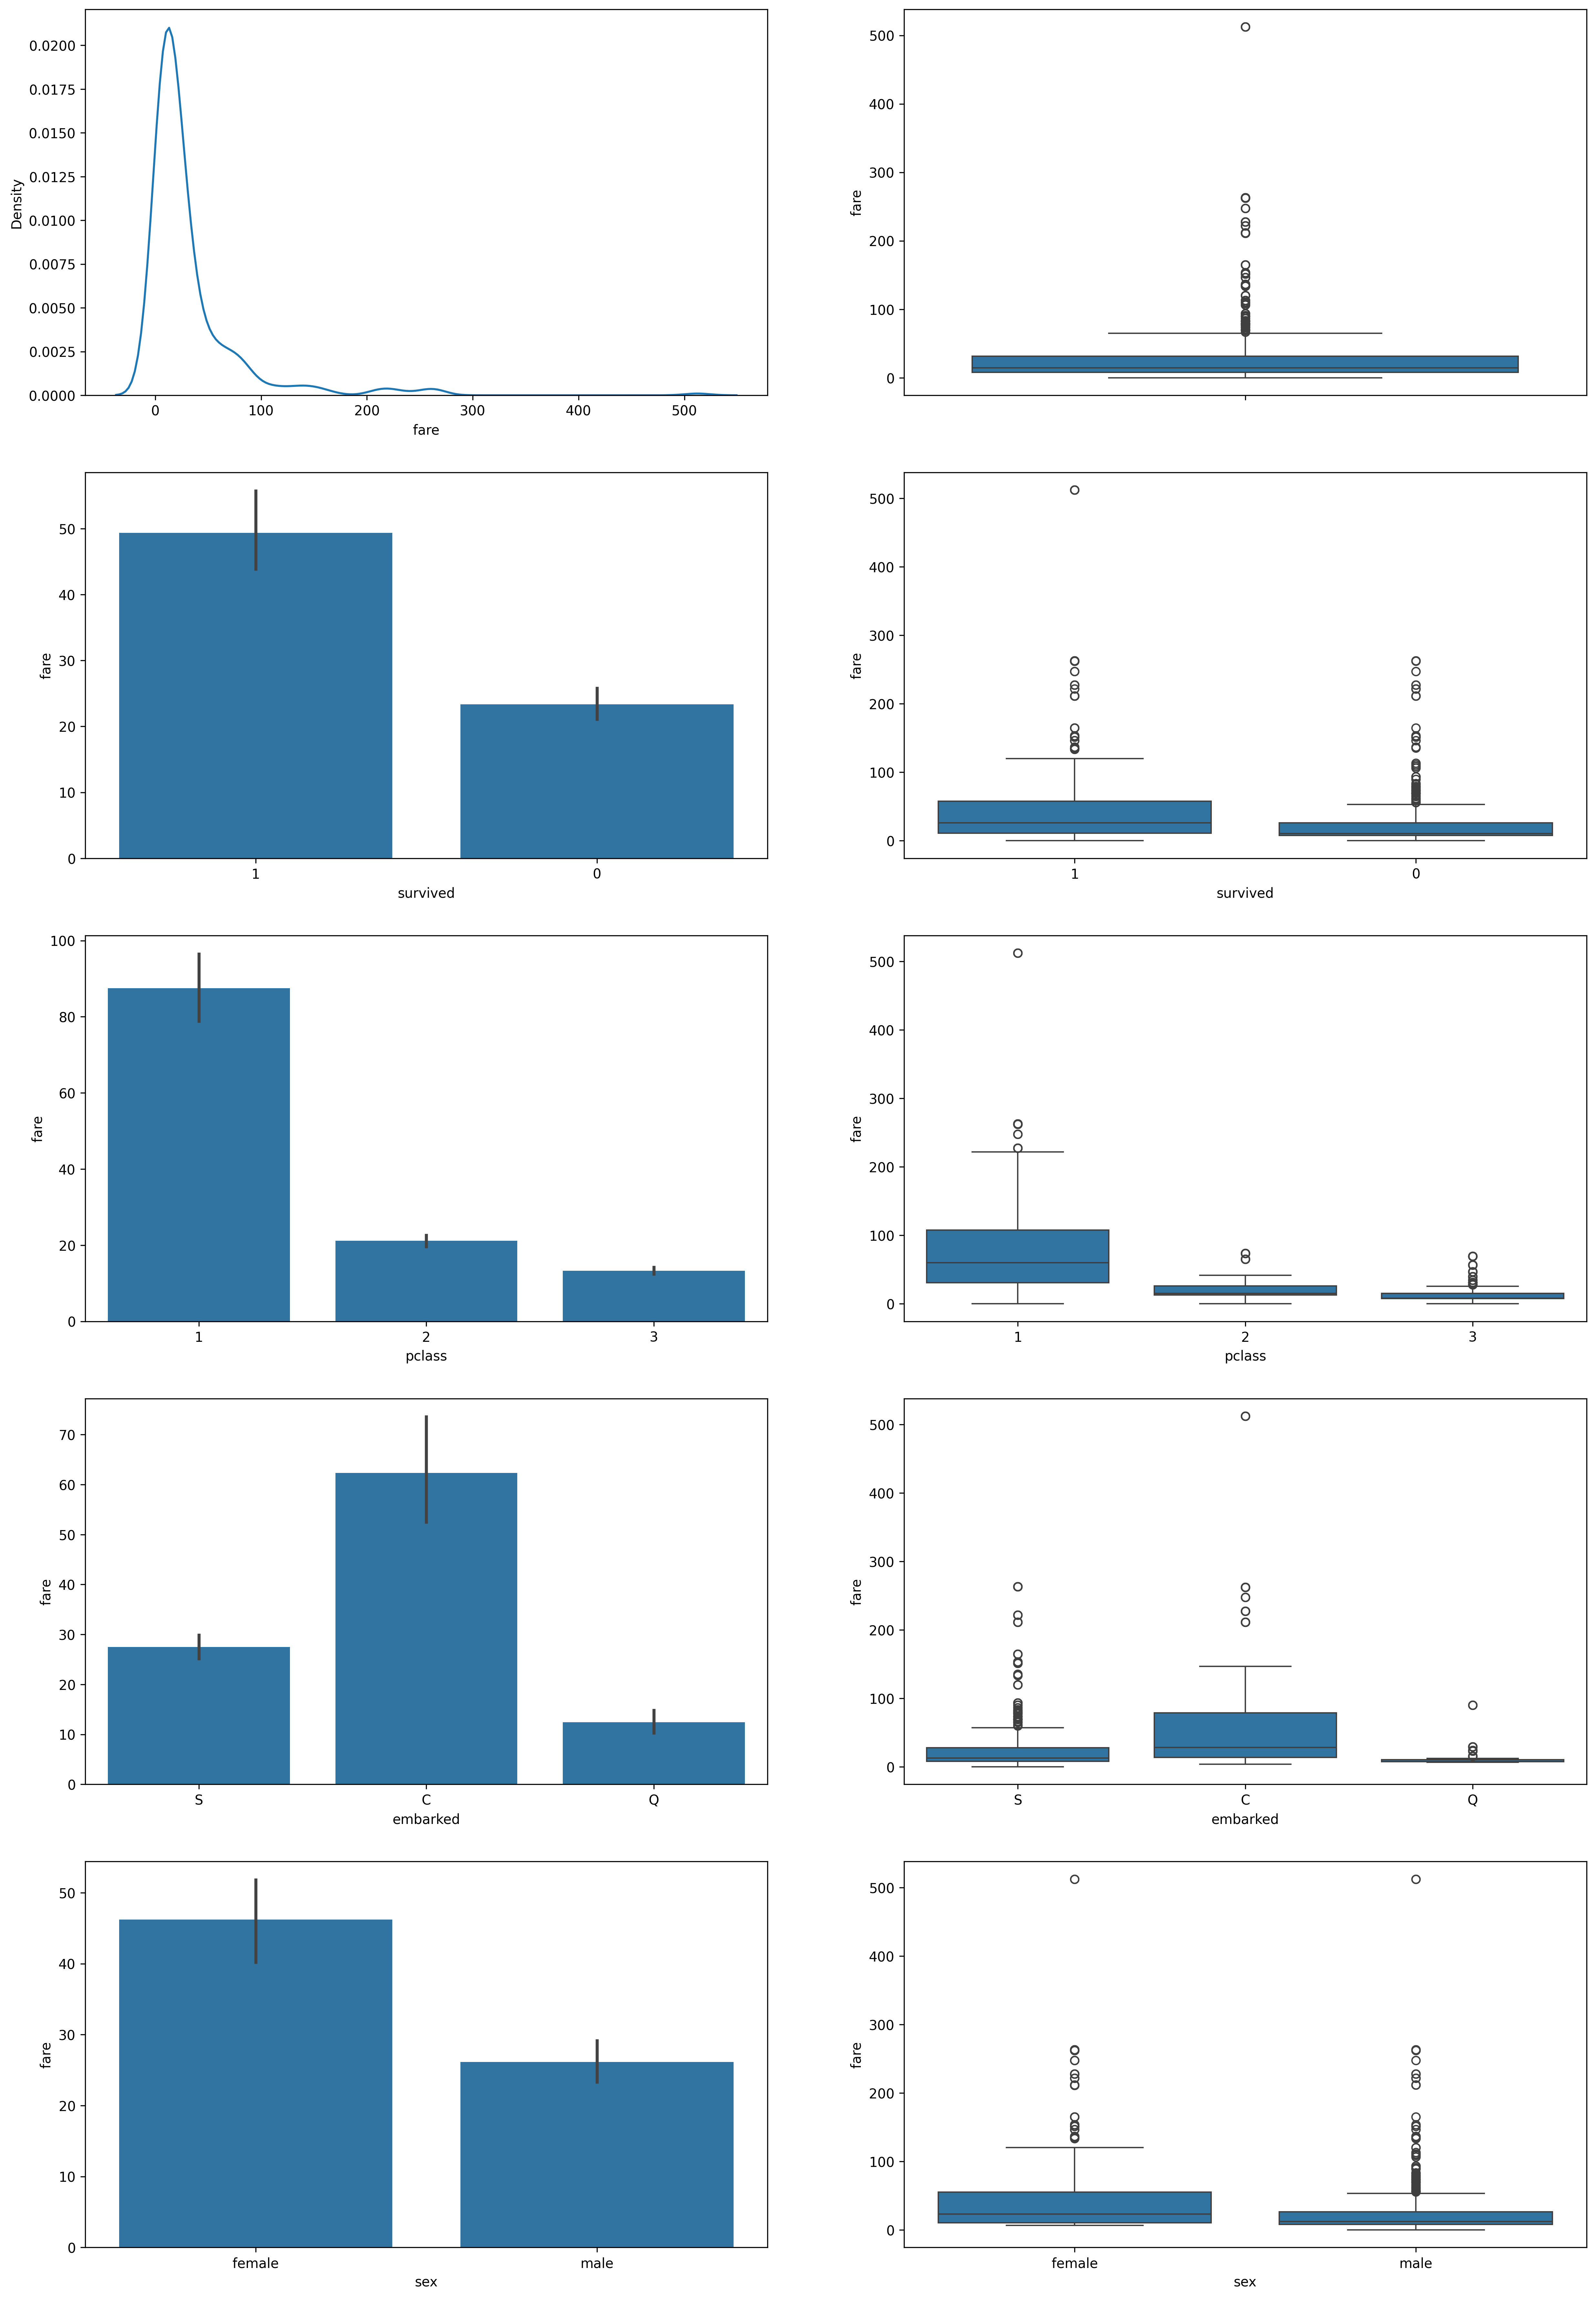

In [31]:
# Analysing fare column

plt.figure(figsize = (20,30), dpi = 300)
plt.subplot(5,2,1)
sns.distplot(dataframe.fare, hist = False)
plt.subplot(5,2,2)
sns.boxplot(dataframe.fare)

plt.subplot(5,2,3)
sns.barplot(x = dataframe.survived, y = dataframe.fare)
plt.subplot(5,2,4)
sns.boxplot(x = dataframe.survived, y = dataframe.fare)

plt.subplot(5,2,5)
sns.barplot(x = dataframe.pclass, y = dataframe.fare)
plt.subplot(5,2,6)
sns.boxplot(x = dataframe.pclass, y = dataframe.fare)

plt.subplot(5,2,7)
sns.barplot(x = dataframe.embarked, y = dataframe.fare)
plt.subplot(5,2,8)
sns.boxplot(x = dataframe.embarked, y = dataframe.fare)

plt.subplot(5,2,9)
sns.barplot(x = dataframe.sex, y = dataframe.fare)
plt.subplot(5,2,10)
sns.boxplot(x = dataframe.sex, y = dataframe.fare)

# ***Panda Profiling***

In [ ]:
!pip uninstall pandas-profiling visions numba -y
!pip install ydata-profiling==4.17.0

In [32]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataframe, title="Data Profiling Report", explorative=True)
profile.to_file("result.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 34.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]